<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/05b-stat-significance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# Statistical Significance

Test whether a **sample** drawn from a population is statistically significant (i.e., if the sample mean is different from the population mean), we can:

1. **Simulate a population** from which a sample is drawn.
2. **Compare the sample mean to the population mean** using a one-sample t-test.
3. **Visualize** both the population and the sample distributions to help visualize statistical significance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Simulate a population with known mean and standard deviation
# Assume the population has a mean of 50 and standard deviation of 10
population = np.random.normal(loc = 50, scale = 10, size = 10000)  # Large population size of 10,000

In [3]:
# Step 2: Draw a sample from the population (e.g., 100 data points)
sample = np.random.choice(population, size=100, replace=False)

In [4]:
# Sample Mean
print(np.mean(sample))

51.16787915349687


- **T-statistic**: Measures how many standard deviations the sample mean is from the population mean.
- **P-value**: Tells us the probability of observing a difference as extreme as the one between the sample and the population if the null hypothesis is true.

In [5]:
# Step 3: Perform a one-sample t-test

# Null Hypothesis: The sample mean is equal to the population mean (50)
# Alternative Hypothesis: The sample mean is not equal to the population mean

population_mean = 50  # Known population mean
t_stat, p_value = stats.ttest_1samp(sample, population_mean)

# Print t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.0908493956211645
P-value: 0.2779870125258781


In [6]:
# Step 4: Determine if the p-value is statistically significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("The result is statistically significant (reject the null hypothesis).")
else:
    print("The result is not statistically significant (fail to reject the null hypothesis).")

The result is not statistically significant (fail to reject the null hypothesis).


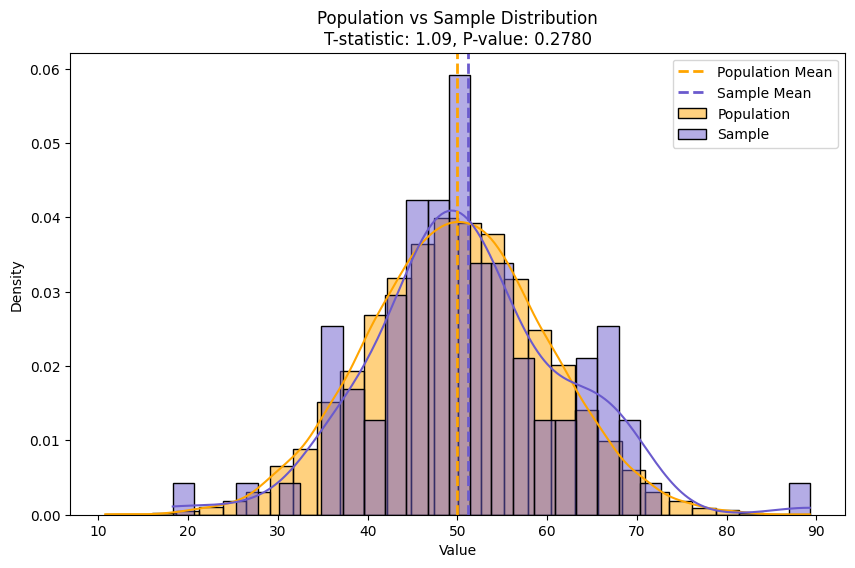

In [7]:
# Step 5: Visualization
plt.figure(figsize=(10, 6))

# Plot population distribution
sns.histplot(population, color="orange", label="Population", kde=True, stat="density", bins=30)

# Plot sample distribution
sns.histplot(sample, color="slateblue", label="Sample", kde=True, stat="density", bins=30)

# Plot mean lines
plt.axvline(np.mean(population), color='orange', linestyle='dashed', linewidth=2, label='Population Mean')
plt.axvline(np.mean(sample), color='slateblue', linestyle='dashed', linewidth=2, label='Sample Mean')

# Add titles and labels
plt.title(f'Population vs Sample Distribution\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

- **Conclusion**: If the p-value is greater than 0.05, the null hypothesis is true and the sample is not significantly different than the population.
